In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp
import math
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("./class")
from Flow_class import Flow

In [3]:
Nx=100
L=1.0
#phys_dims=[1,1]
phys_dims=[L]
#g=pp.CartGrid([Nx,Ny],phys_dims)
g=pp.CartGrid([Nx],phys_dims)
g.compute_geometry()
#pp.plot_grid(g,figsize=(15,12))
#p.plot_grid(g)

In [4]:
# Permeability
perm = pp.SecondOrderTensor(1e-7*np.ones(g.num_cells))                     
f_lambda= lambda x,y,z: math.sin(4*math.pi*x)
# Boundary conditions
b_faces = g.tags['domain_boundary_faces'].nonzero()[0]
bc = pp.BoundaryCondition(g, b_faces, ['dir']*b_faces.size)
bc_val = np.zeros(g.num_faces)
bc_val[0]=1e6
bc_val[bc_val.size-1]=-800000.0

# Collect all parameters in a dictionary
parameters = {"second_order_tensor": perm, "f_lambda": f_lambda, "bc": bc, "bc_values": bc_val}

In [5]:
flow=Flow(g,parameters,"Tpfa")
flow.set_source()
p=flow.solve()

Tpfa


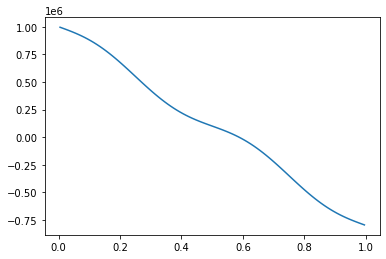

In [6]:
h=1/Nx
x=np.linspace(1/(2*Nx),1-1/(2*Nx),Nx)
plt.plot(x,p)

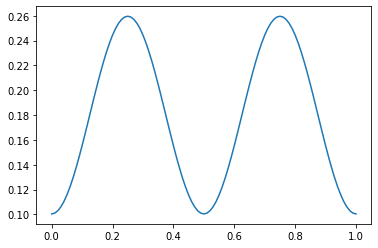

In [7]:
vel=flow.compute_flux(p)
x_vel=np.linspace(0,L,g.num_faces)
plt.plot(x_vel,vel)